<a href="https://colab.research.google.com/github/Nik8x/Pyspark_Images/blob/master/PySpark_Loading_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.3.0/spark-2.3.0-bin-hadoop2.7.tgz
!tar xf spark-2.3.0-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install pyspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.0-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

sc = spark.sparkContext

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# for google colab
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Skin Cancer MNIST HAM10000")
!ls

HAM10000_metadata.csv  hmnist_8_8_RGB.csv  Skin_Cancer_HAM10000_dataset.ipynb
hmnist_28_28_L.csv     imagefolder_1	   spark-2.3.0-bin-hadoop2.7
hmnist_28_28_RGB.csv   imagefolder_2	   spark-2.3.0-bin-hadoop2.7.tgz
hmnist_8_8_L.csv       my_model.h5	   Untitled0.ipynb


In [0]:
from pyspark.ml.image import ImageSchema

In [0]:
x = ImageSchema.readImages("/content/drive/My Drive/Colab Notebooks/Skin Cancer MNIST HAM10000/imagefolder_1/*.jpg")

In [15]:
type(x)

pyspark.sql.dataframe.DataFrame

In [16]:
x.printSchema()

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = false)
 |    |-- width: integer (nullable = false)
 |    |-- nChannels: integer (nullable = false)
 |    |-- mode: integer (nullable = false)
 |    |-- data: binary (nullable = false)



In [19]:
x.schema.names

['image']

In [27]:
x.show(4)

+--------------------+
|               image|
+--------------------+
|[file:/content/dr...|
|[file:/content/dr...|
|[file:/content/dr...|
|[file:/content/dr...|
+--------------------+
only showing top 4 rows



In [25]:
x.take(1)[0][0][0]

'file:/content/drive/My Drive/Colab Notebooks/Skin Cancer MNIST HAM10000/imagefolder_1/ISIC_0028303.jpg'

In [0]:
x.take(1)

## out> [Row(image=Row(origin='file:/content/drive/My Drive/Colab Notebooks/Skin Cancer MNIST HAM10000/imagefolder_1/ISIC_0028303.jpg', height=450, width=600, nChannels=3, mode=16, 
## data=bytearray(b'\xb9\xab\xc3\xb8\xaa\xc2......

In [0]:
# x.repartition(1)

In [0]:
x.take(1)[0][0][5]

## out> bytearray(b'\xb9\xab\xc3\xb8\xaa\xc2\xb8\xaa\xc2\xb6\xa8\xc0\xb7\xa9\xc1\xb7\xa9\xc1\xba\xaa\xc1......

In [63]:
z = x.select([x.image.origin] + [x.image.data])
z.show(4)

+--------------------+--------------------+
|        image.origin|          image.data|
+--------------------+--------------------+
|file:/content/dri...|[B9 AB C3 B8 AA C...|
|file:/content/dri...|[B1 92 D1 B1 97 D...|
|file:/content/dri...|[81 7F AD 7F 7E A...|
|file:/content/dri...|[B6 94 B2 B3 92 A...|
+--------------------+--------------------+
only showing top 4 rows



In [102]:
z = z.withColumnRenamed("image.origin", "path").withColumnRenamed("image.data", "array")
## or # z.selectExpr("image.origin as path", "image.data as array")
z.show(4)

+--------------------+--------------------+
|                path|               array|
+--------------------+--------------------+
|file:/content/dri...|[B9 AB C3 B8 AA C...|
|file:/content/dri...|[B1 92 D1 B1 97 D...|
|file:/content/dri...|[81 7F AD 7F 7E A...|
|file:/content/dri...|[B6 94 B2 B3 92 A...|
+--------------------+--------------------+
only showing top 4 rows



In [111]:
z.count()

5000

In [108]:
z.explain()

== Physical Plan ==
*(1) Project [image#8.origin AS path#180, image#8.data AS array#183]
+- Scan ExistingRDD[image#8]


In [0]:
z.select("path", "array").write.save("pathandarray.csv")

In [0]:
z.select("path", "array").write.save("pathandarray.parquet")

In [0]:
z.select("path", "array").write.save("pathandarray.json", format = "json")

In [103]:
print(z.schema)
print(z.schema.names)

StructType(List(StructField(path,StringType,true),StructField(array,BinaryType,true)))
['path', 'array']


# OR

In [0]:
# !pip install sparkdl
# !pip install tensorframes
# !pip install kafka
# !pip install tensorflowonspark
# from sparkdl import readImages

In [0]:
x = sc.binaryFiles('/content/drive/My Drive/Colab Notebooks/Skin Cancer MNIST HAM10000/imagefolder_1/*.jpg', minPartitions = 5).repartition(5)

In [0]:
x.take(1)

## out> [('file:/content/drive/My Drive/Colab Notebooks/Skin Cancer MNIST HAM10000/imagefolder_1/ISIC_0028342.jpg',
 ## b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x.........

In [0]:
x_list = x.take(1)

In [200]:
type(x)

pyspark.rdd.RDD

In [144]:
x_list[0][1].encode('iso-8859-1')

str

In [0]:
#x_list[0][1].decode('cp1250') 
#str(x_list[0][1], 'utf-8')
#"".join(map(chr, x_list[0][1]))
#np.array('b', x_list[0][1])
rawdata = x_list[0][1].decode("utf-8", errors="ignore")

In [0]:
rawdata#.encode('utf-8', errors="ignore")

## out> '\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\.........

In [0]:
!pwd

/content/drive/My Drive/Colab Notebooks/Skin Cancer MNIST HAM10000


In [0]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
from PIL import Image
from io import BytesIO

In [0]:
try:
  print(np.asarray(Image.open(StringIO(x_list[0][1]))))

except:
  print(np.asarray(Image.open(BytesIO(x_list[0][1]))))

In [0]:
image_to_array = lambda rawdata: np.asarray(Image.open(BytesIO(x_list[0][1])))
y = x.values().map(image_to_array)

In [168]:
y.take(1)

[array([[[213, 123, 135],
         [215, 122, 133],
         [219, 123, 134],
         ...,
         [224, 142, 156],
         [229, 147, 159],
         [226, 144, 156]],
 
        [[213, 123, 133],
         [216, 125, 134],
         [215, 124, 133],
         ...,
         [226, 144, 156],
         [227, 145, 157],
         [228, 144, 157]],
 
        [[211, 121, 133],
         [215, 122, 133],
         [214, 121, 132],
         ...,
         [227, 143, 158],
         [226, 142, 157],
         [226, 142, 157]],
 
        ...,
 
        [[199, 121, 117],
         [200, 127, 118],
         [200, 125, 120],
         ...,
         [206, 135, 141],
         [208, 135, 142],
         [208, 137, 143]],
 
        [[202, 121, 120],
         [201, 121, 120],
         [203, 123, 122],
         ...,
         [205, 134, 140],
         [208, 138, 140],
         [209, 143, 144]],
 
        [[199, 122, 116],
         [197, 122, 117],
         [203, 125, 121],
         ...,
         [204, 132, 143],
  

In [170]:
y.getNumPartitions()

5

#OR

In [0]:
import cv2
image = cv2.imread("imagefolder_1/ISIC_0024306.jpg")
image2 = sc.parallelize(cv2.imread("imagefolder_1/ISIC_0024306.jpg"))

In [0]:
from tqdm import tqdm_notebook as tqdm

In [0]:
image_list = []
for image_name in tqdm(os.listdir("imagefolder_1")[0:20]):
  image_list.append(sc.parallelize(cv2.imread("imagefolder_1/" + image_name)))

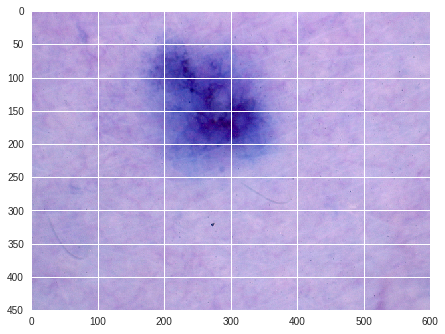

In [0]:
plt.imshow(image_list[1].collect())